In [93]:
import sympy  as sp
from sympy import *
import numpy as np
#Para resolver sistemas de ecuaciones diferencials 
from sympy.solvers.ode.systems import dsolve_system
from IPython.display import display, Math


In [52]:
sp.interactive.printing.init_printing(use_latex=True)

In [176]:
#Declaración de las variables que vamos a usar
phi, theta= sp.symbols('phi theta')
r = 2
#Vector con las variables que vamos a usar 
variables = [theta,phi]




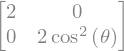

In [177]:
#Expreso la métrica en forma matricial 
g = sp.Matrix([[r,0],[0,r*cos(theta)**2]])
g

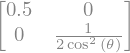

In [178]:
#Esto es para poder hacerlo en python y no en sympy que es horrible
g = [[r,0],[0,r*cos(theta)**2]]

#SOLO SIRVE PARA MATRICES DIAGONALES 
g_inv = [[i for i in v] for v in g]
for i in range(len(g_inv)):
    for j in range(len(g_inv)):
        if g_inv[i][j]!= 0:
            g_inv[i][i]= g_inv[i][i]**-1
#Para ver bonita la matriz inversa 
g_inv_sp  = Matrix(g_inv)
g_inv_sp
        

In [179]:
#Este vector va a contener la matriz g derivada respecto de cada la variable
#Por ejemplo derivadas_variable[0] es la derivada de toda la matriz respecto de t
#            derivadas_variable[1] es la derivada de toda la matriz respecto de x
#Y derivadas_variable[1][0][0] es la derivad parcial de g_{0,0} respecto x
# y así sucesivamente 
derivadas_variable = []

for variable in variables: 
    derivada_variable = [[0 for i in variables] for j in variables]
    for i in range(len(variables)):
        for j in range(len(variables)): 
            funcion = g[i][j]
            #Para no hacer la derivada de un número 
            if type(funcion) == sp.core.mul.Mul or type(funcion) == sp.core.power.Pow: 
                derivada_variable[i][j] = simplify(funcion.diff(variable))
                
    derivadas_variable.append(derivada_variable)
derivadas_variable

In [180]:


#Esta matriz va a tener los simbolos de chistoffle 
#Por ejemplo, simbolo_chirtoffle[2][0][1] sería \gamma^y_{t,x}
simbolos_chistoffle = [[[0 for j in variables] for i in variables] for m in variables]


for m in range(len(variables)):
    for i in range(len(variables)):
        for j in range(len(variables)):
            simbolo = 0
            #El sumatorio respecto del indice libre l 
            for l in range(len(variables)):
                #Para evitar hacer una multiplicación por 0 
                if  g_inv[m][l] != 0: 
                    simbolo =simbolo + g_inv[m][l]*(derivadas_variable[j][i][l]+derivadas_variable[i][j][l]-derivadas_variable[l][i][j])
            #Aquí multiplico  por el 1/2 que hemos sacado de factor común 
            simbolo =1/2*simbolo
            simbolos_chistoffle[m][i][j] = simplify(simbolo)

In [181]:

for i in range(len(simbolos_chistoffle)):
    for j in range(len(simbolos_chistoffle)):
        for k in range(len(simbolos_chistoffle)):
             if simbolos_chistoffle[i][j][k] != 0:
                display(Math(f'\Gamma^{{{variables[i]}}}_{{{variables[j]},{variables[k]}}} = ' +latex(simbolos_chistoffle[i][j][k])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [182]:
#Variable para poder derivar 
tau = sp.symbols("tau")

#Defino las derivadas, esto para poder resolverlo 
dr = sp.Function("dr")(tau)
dphi = sp.Function('dphi')(tau) 
dtheta = sp.Function("dtheta")(tau)
#Quitamos dz
variables_derivadas = [dphi,dtheta]


In [183]:
#Esto va a con
geodesicas = [i.diff(tau) for i in variables_derivadas]

for variable in range(len(variables)): 
    for i in range(len(variables)):
        for j in range(len(variables)):
            geodesicas[variable] = geodesicas[variable] +simplify( simbolos_chistoffle[variable][i][j]*variables_derivadas[i]*variables_derivadas[j])
    geodesicas[variable] = sp.Eq(geodesicas[variable],0)
    


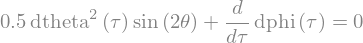

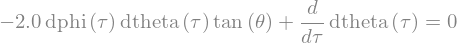

In [184]:
for v in geodesicas: 
    display(v)

In [156]:
r = sp.Function('r')(tau)
phi = sp.Function('phi')(tau)
theta = sp.Function('theta')(tau)


In [157]:
u_0 =  sp.Function('u_0')(tau)
u_1 = sp.Function("u_1")(tau)
u_2 = sp.Function("u_2")(tau)

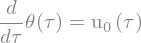

In [160]:
dtheta = sp.Eq(theta.diff(),u_0)
dtheta

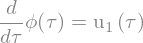

In [161]:
dphi = sp.Eq(phi.diff(),u_1)
dphi

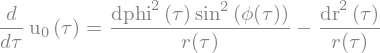

In [38]:
du_0 = sp.Eq(u_0.diff(),-dr**2/r+(dphi**2*sin(phi)**2)/r)
du_0

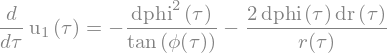

In [39]:
du_1 = sp.Eq(u_1.diff(tau),-(dphi**2/tan(phi)+2*dphi*dr/r) )
du_1

In [162]:
dsolve_system([dtheta,dphi,geodesicas[0],geodesicas[1]])

NotImplementedError: 
The system of ODEs passed cannot be solved by dsolve_system.

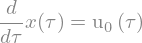

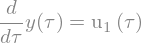

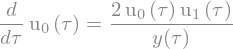

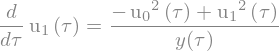

In [23]:
display(dx)
display(dy)
display(du_0)
display(du_1)